In [1]:
import json
import datetime
import matplotlib.pyplot as plt

In [3]:
with open('data/edinburgh_restaurant_reviews.json', 'r') as fp:
    res_reviews = json.load(fp)

In [4]:
def rating_time(review):
    datestr = review['date']
    date = datetime.datetime.strptime(datestr, '%Y-%m-%d').date()
    return {'date': date, 'rating': review['stars']}

In [5]:
def rating_density(rating_list):
    deltas = [rating_list[ii]['date'] - rating_list[ii-1]['date'] for ii in range(len(rating_list))[1:]]
    day_gaps = [r.days for r in deltas]
    av_gap = float(sum(day_gaps)) / len(day_gaps)
    return av_gap

In [6]:
def prec_month_rating(rating_list):
    month_delta = datetime.timedelta(28)
    for rl in rating_list:
        last_month_ratings = [rr['rating'] for rr in rating_list
                              if rl['date'] - month_delta < rr['date'] <= rl['date']]
        lm_mean = float(sum(last_month_ratings)) / len(last_month_ratings)
        rl['pmr'] = lm_mean

In [7]:
ratings = {}
for res in res_reviews:
    ratings[res] = [rating_time(rr) for rr in res_reviews[res]]

In [8]:
rd = [rating_density(rr) for rr in ratings.values() if len(rr) > 1]
rev_rate = [28.0 / xx for xx in rd if xx > 0.0]

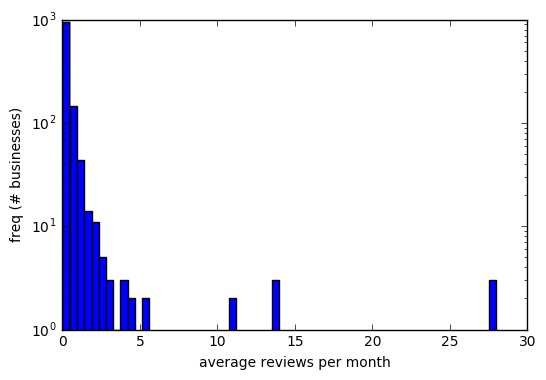

In [9]:
plt.hist(rev_rate, bins=60, log=True)
plt.ylabel('freq (# businesses)')
plt.xlabel('average reviews per month')
plt.show()

In [10]:
rlll = ratings.values()[102]
prec_month_rating(rlll)
rlll

[{'date': datetime.date(2012, 9, 3), 'pmr': 5.0, 'rating': 5},
 {'date': datetime.date(2012, 12, 4), 'pmr': 5.0, 'rating': 5},
 {'date': datetime.date(2013, 2, 1), 'pmr': 4.0, 'rating': 4},
 {'date': datetime.date(2013, 2, 10), 'pmr': 4.5, 'rating': 5},
 {'date': datetime.date(2013, 2, 17), 'pmr': 4.0, 'rating': 4},
 {'date': datetime.date(2013, 2, 17), 'pmr': 4.0, 'rating': 3},
 {'date': datetime.date(2013, 2, 18), 'pmr': 3.8, 'rating': 3},
 {'date': datetime.date(2013, 3, 1), 'pmr': 3.6, 'rating': 3},
 {'date': datetime.date(2013, 3, 28), 'pmr': 2.0, 'rating': 1},
 {'date': datetime.date(2013, 3, 29), 'pmr': 2.5, 'rating': 4},
 {'date': datetime.date(2013, 6, 17), 'pmr': 2.0, 'rating': 2},
 {'date': datetime.date(2014, 5, 23), 'pmr': 3.0, 'rating': 3},
 {'date': datetime.date(2015, 2, 11), 'pmr': 2.0, 'rating': 2},
 {'date': datetime.date(2015, 2, 23), 'pmr': 2.5, 'rating': 3},
 {'date': datetime.date(2015, 3, 4), 'pmr': 3.3333333333333335, 'rating': 5},
 {'date': datetime.date(2015,